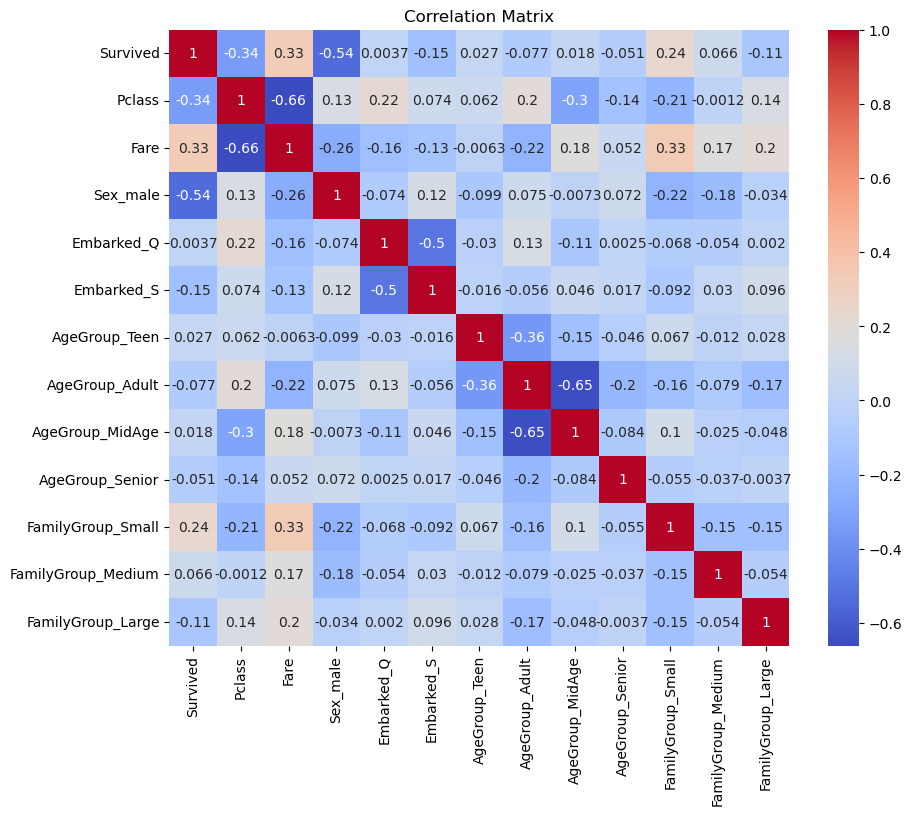

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('./input/train.csv')

def preprocess(df, mean_age=None, mode_embarked=None):
    df = df.copy()

    # Nếu chưa truyền mean/mode, tính từ df (thường là train)
    if mean_age is None:
        mean_age = df['Age'].mean()
    if mode_embarked is None:
        mode_embarked = df['Embarked'].mode()[0]

    # Điền giá trị thiếu
    df['Age'] = df['Age'].fillna(mean_age)
    df['Embarked'] = df['Embarked'].fillna(mode_embarked)

    # Xử lý outlier
    df['Age'] = df['Age'].clip(0, 65)
    df['SibSp'] = df['SibSp'].clip(0, 5)
    df['Parch'] = df['Parch'].clip(0, 4)
    df['Fare'] = np.log1p(df['Fare'])

    # --- Tạo feature FamilySize ---
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1  # +1 cho bản thân

    # Chia nhóm FamilySize
    bins = [0, 1, 3, 5, 20]  # Solo, Small, Medium, Large
    labels = ['Solo', 'Small', 'Medium', 'Large']
    df['FamilyGroup'] = pd.cut(df['FamilySize'], bins=bins, labels=labels)

    # --- MÃ HÓA ---
    # 1️ Phân nhóm tuổi (Age bins)
    age_bins = [0, 12, 18, 35, 60, 100]
    age_labels = ['Child', 'Teen', 'Adult', 'MidAge', 'Senior']
    df['AgeGroup'] = pd.cut(df['Age'], bins=age_bins, labels=age_labels)

    # 2️ One-hot encode cho biến phân loại
    df = pd.get_dummies(df, columns=['Sex', 'Embarked', 'AgeGroup', 'FamilyGroup'], drop_first=True)

    # Drop các cột không cần thiết
    df = df.drop(['Cabin', 'Age', 'PassengerId', 'Name', 'Ticket', 'SibSp', 'Parch', 'FamilySize'], axis=1)
    return df, mean_age, mode_embarked

adjusted_df, mean_age, mode_embarked = preprocess(df)
plt.figure(figsize=(10,8))
sns.heatmap(adjusted_df.corr(), annot=True, cmap="coolwarm")
plt.title("Correlation Matrix")
plt.show()
